# Dog Breed Image Classification

**Data Scientist** : Anhduy Nguyen

**Date** July 7, 2022

### Stake Holder

- American Society for the Prevention of Cruelty to Animals(ASPCA)

### Business Understanding

The ASPCA has informed us that over 6.5 million animals are taken into US shelters annualy, which 3.3 million of those are dogs.  Only around 50% of the sheltered animals are adopted, 20-30% are euthanized, while the remaining stay in the shelters.

### Business Problem

This task at hand is to build a image classification system utilizing pictures of 120 breeds of dogs to classify incoming strays into their breed category.  This will help identify each incoming stray and decrease the workload on the volunteers and workers at animal shelters.  By labeling each stray it will help potential adopters search for the specific dog breed they want or the ability to research the temperament and overall information about raising the specific dog breed before their adoption.

### Data Understanding

The data was retrieved from the Stanford Dog Dataset. The data can be retrieved from (http://vision.stanford.edu/aditya86/ImageNetDogs/), but also has been linked at Kaggle.com(https://www.kaggle.com/datasets/jessicali9530/stanford-dogs-dataset).  There are around 20580 images split into 120 different breeds.  The images were precleaned only retaining adult image of dogs and only images that had a greater than 200 x 200 pixel size.

## Import Libraries

In [55]:
import time
import matplotlib.pyplot as plt
import scipy
import numpy as np
import seaborn as sns
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import warnings
warnings.filterwarnings('ignore')


from numpy.random import seed
seed(42)

import os
import tqdm
from os import walk

import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import BatchNormalization


import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import BatchNormalization
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model, load_model, Sequential
from keras.layers import Dense, GlobalAveragePooling2D
from keras.initializers import RandomNormal
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD
import pathlib
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

from tensorflow.keras.optimizers import Adam, RMSprop

import re

## 1 Data Preparation

The data has already been split into the different dog breed previously a 120 in total and the only data preparation that needs to be done are splitting the data into the Train and Validation/Test sets.

### 1.A Pulling in the Data into Train and Test Sets

In [56]:
# Importing Train and Test/Validation Set

train_ds = tf.keras.preprocessing.image_dataset_from_directory('Data/images/Images/', validation_split = .2, subset= 'training',
                                                      seed = 42, image_size = (299,299),
                                                      batch_size = 32)

test_ds = tf.keras.preprocessing.image_dataset_from_directory('Data/images/Images/', validation_split = .2, subset= 'validation',
                                                      seed = 42, image_size = (299,299),
                                                      batch_size = 32)

Found 20580 files belonging to 120 classes.
Using 16464 files for training.
Found 20580 files belonging to 120 classes.
Using 4116 files for validation.


In [57]:
# Showing the Shape of the data

print("Train Shape", train_ds)

print("Test Shape", test_ds)

Train Shape <BatchDataset shapes: ((None, 299, 299, 3), (None,)), types: (tf.float32, tf.int32)>
Test Shape <BatchDataset shapes: ((None, 299, 299, 3), (None,)), types: (tf.float32, tf.int32)>


- As shown above the images are split into the training set which contains 16464 images and the test set which is 4116 images.  The shapes of the data is 299, 299, 3.  Which represents 299 x 299 pixels and 3 which represents rgb.

- Due to the Image classification needing a large amount of data to train a good model we will be augmenting our data set by shifting, rotating, and flipping the images.

### 1. B Data Augmentation

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal",
                                                     input_shape=(299,
                                                                 299,
                                                                 3)),
        layers.experimental.preprocessing.RandomRotation(.4),
        layers.experimental.preprocessing.RandomZoom(.2),
    ]
)

In [77]:
# The augmentation being done on the data

data_augmentation_transfer = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal",
                                                     input_shape=(299,
                                                                 299,
                                                                 3)),
        layers.experimental.preprocessing.RandomRotation(.4),
        layers.experimental.preprocessing.RandomWidth(.2),
        layers.experimental.preprocessing.RandomHeight(.2),
        layers.experimental.preprocessing.RandomZoom(.2),
    ]
)

### 1. C Creating Target Variables

In [78]:
# Creating target variables which are the 120 breed names

# Fix class names by removing number identifier and -
class_names = train_ds.class_names
print(class_names)
dog_names = [word for line in class_names for word in re.split('0-|1-|2-|3-|4-|5-|6-|7-|8-|9-', line)]

# Making another list for cleaned names
print([i for i in range(len(dog_names)) if i % 2 == 1])

dog_names2 =[]
for i in range(len(dog_names)):
        if i % 2 == 1:
            dog_names2.append(dog_names[i])

['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 'n02091635-otterhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02093647-Bedlington_terrier', 'n02093754-Border_terrier', 'n02093859-Kerry_blue_terrier', 'n02093991-Irish_terrier', 'n02094114-Norfolk_terrier', 'n02094258-Norwich_terrier', 'n02094433-Yorkshire_t

In [79]:
# Sanity Check the label names

dog_names2

['Chihuahua',
 'Japanese_spaniel',
 'Maltese_dog',
 'Pekinese',
 'Shih-Tzu',
 'Blenheim_spaniel',
 'papillon',
 'toy_terrier',
 'Rhodesian_ridgeback',
 'Afghan_hound',
 'basset',
 'beagle',
 'bloodhound',
 'bluetick',
 'black-and-tan_coonhound',
 'Walker_hound',
 'English_foxhound',
 'redbone',
 'borzoi',
 'Irish_wolfhound',
 'Italian_greyhound',
 'whippet',
 'Ibizan_hound',
 'Norwegian_elkhound',
 'otterhound',
 'Saluki',
 'Scottish_deerhound',
 'Weimaraner',
 'Staffordshire_bullterrier',
 'American_Staffordshire_terrier',
 'Bedlington_terrier',
 'Border_terrier',
 'Kerry_blue_terrier',
 'Irish_terrier',
 'Norfolk_terrier',
 'Norwich_terrier',
 'Yorkshire_terrier',
 'wire-haired_fox_terrier',
 'Lakeland_terrier',
 'Sealyham_terrier',
 'Airedale',
 'cairn',
 'Australian_terrier',
 'Dandie_Dinmont',
 'Boston_bull',
 'miniature_schnauzer',
 'giant_schnauzer',
 'standard_schnauzer',
 'Scotch_terrier',
 'Tibetan_terrier',
 'silky_terrier',
 'soft-coated_wheaten_terrier',
 'West_Highland_wh

### 1. D Showing Images of the Dogs

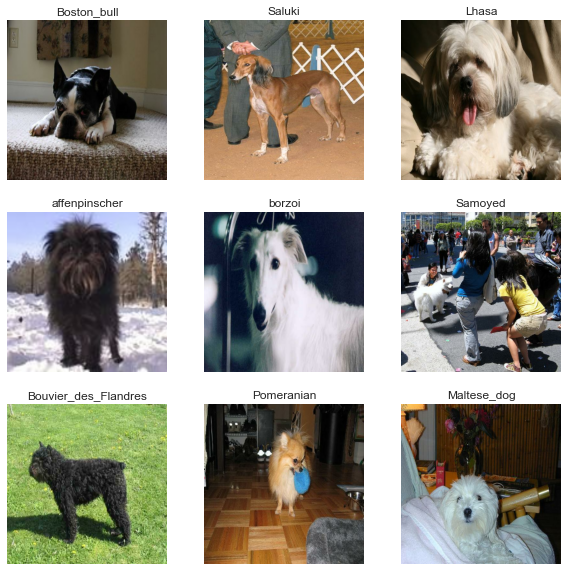

In [80]:
# Sample showing dog and dog name

import matplotlib.pyplot as plt

sns.set_style("white")

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(dog_names2[labels[i]])
    plt.axis("off")
    plt.savefig('Images/DogImages.png', bbox_inches = "tight")
plt.show()


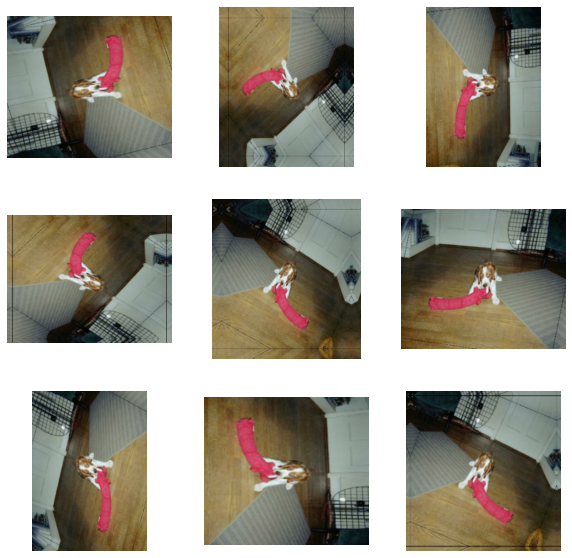

In [83]:
## Showing Images with Data Augmentation

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation_transfer(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")
    plt.savefig('Images/DogImagesAugmentation.png', bbox_inches = "tight")
plt.show()

## 2 Modeling

### 2. A Base Model

In [9]:
# Base Model without data augmentation

num_classes = len(dog_names2)

model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(299, 299, 3)))
model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(len(dog_names2)))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

history = model.fit(
    train_ds,
    epochs = 10, 
    validation_data = test_ds)

print(f"\nTraining Score: {model.evaluate(train_ds)}")
print(f"\nTest Score: {model.evaluate(test_ds)}")

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)       

In [ ]:
## Graphing Base Model
# Accidentally switched to MD will run later

acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

loss = history.history['loss']
test_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, test_acc, label='Test Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Test Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, test_loss, label='Test Loss')
plt.legend(loc='upper right')
plt.title('Training and Test Loss')
plt.show()
plt.savefig('Images/BaseModel.png', bbox_inches = "tight")

- It looks like the model is severly overfitting, Adding Data Augmentation and Dropout to reduce variance

### 2. B 2nd Model

In [11]:
# 2nd Model with Data Augmentation and Dropout

model = Sequential()
model.add(data_augmentation)
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(299, 299, 3)))
model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

history = model.fit(
    train_ds,
    epochs = 15, 
    validation_data= test_ds)


print(f"\nTraining Score: {model.evaluate(train_ds)}")
print(f"\nTest Score: {model.evaluate(test_ds)}")

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 256, 256, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 64)       

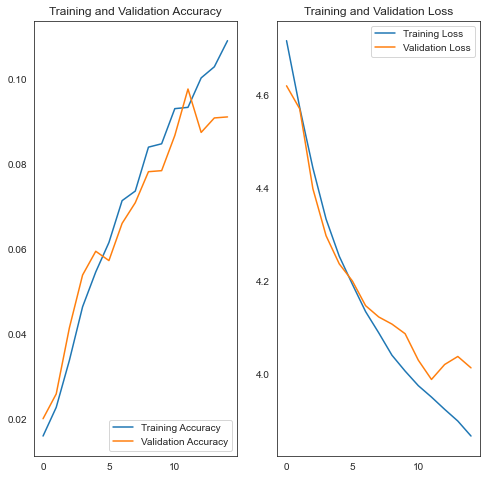

<Figure size 432x288 with 0 Axes>

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
plt.savefig('Images/2ndModel.png', bbox_inches = "tight")

- We have solved the overfitting problem but the model training score has dropped alot, but its test score has increased by 5%
- Lets add Batch Normalization to see if there is and increase in the score

### 2. C 3rd Model

In [13]:
# Add Batch Normalization for 3rd Model

model = Sequential()
model.add(data_augmentation)
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(299, 299, 3)))
model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

history = model.fit(
    train_ds,
    epochs = 10, 
    validation_data= test_ds)


print(f"\nTraining Score: {model.evaluate(train_ds)}")
print(f"\nTest Score: {model.evaluate(test_ds)}")

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 256, 256, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 256, 256, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 16)      64        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 32)     

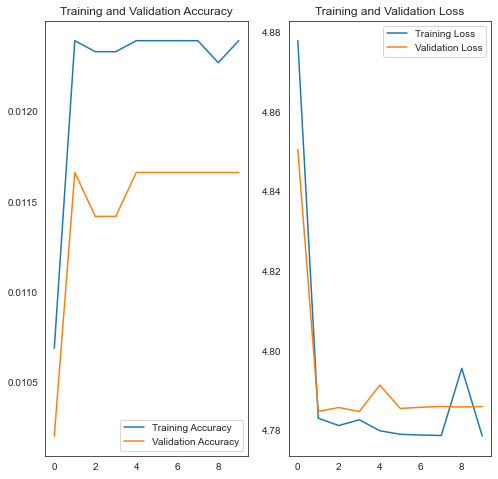

<Figure size 432x288 with 0 Axes>

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
plt.savefig('Images/3rdModel.png', bbox_inches = "tight")

- Batch Normalization actually made the model worst 
- Seems classifying 120 targets can't be solved utilizing  a brand new model will attempt with Transfer Learning

## 3 Transfer Learning

In [84]:
# Adding a Transfer learning model known as InceptionV3 wwhich is known for image classification

pre_trained_model =  InceptionV3(weights = "imagenet", input_shape=(299,299,3), include_top= False)

for layer in pre_trained_model.layers:
    layer.trainable=False
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_197 (Conv2D)             (None, 149, 149, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_191 (BatchN (None, 149, 149, 32) 96          conv2d_197[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 149, 149, 32) 0           batch_normalization_191[0][0]    
_______________________________________________________________________________________

In [85]:
# Using the ninth layer of the Model as input for our final model

last_layer = pre_trained_model.get_layer('mixed9')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 8, 8, 2048)


In [86]:
#  Creating a Callback stopping point for our model to cancell training when reaching 80% Target point

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.80):
      print("\nReached 80.0% accuracy so cancelling training!")
      self.model.stop_training = True

In [92]:
# Final Model

model = Sequential()
model.add(data_augmentation_transfer)
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(299, 299, 3)))
model.add(pre_trained_model)
model.add(GlobalAveragePooling2D())
model.add(layers.Flatten()) 
model.add(layers.Dropout(0.3))
model.add(Dense(2048, activation = 'relu'))
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(len(dog_names2), activation = 'softmax'))

model.compile(optimizer = Adam(lr=0.001), loss ='sparse_categorical_crossentropy', metrics =['accuracy'])

model.summary()

callbacks = myCallback()

history = model.fit(
    train_ds,
    epochs = 15,
    validation_data = test_ds,
    callbacks = [callbacks]
)

print(f"\nTraining Score: {model.evaluate(train_ds)}")
print(f"\nTest Score: {model.evaluate(test_ds)}")

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_7 (Sequential)    (None, None, None, 3)     0         
_________________________________________________________________
rescaling_6 (Rescaling)      (None, 299, 299, 3)       0         
_________________________________________________________________
inception_v3 (Functional)    (None, 8, 8, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_3 ( (None, 2048)              0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 2048)             

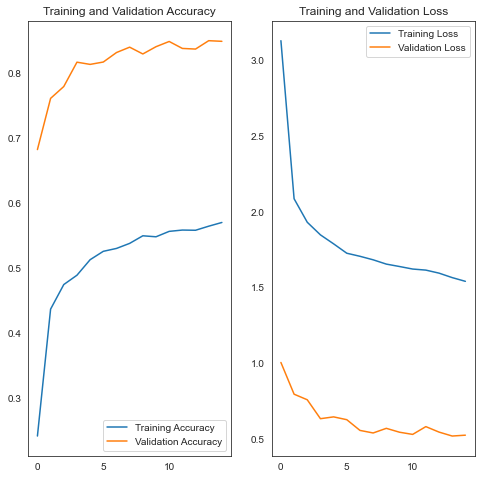

<Figure size 432x288 with 0 Axes>

In [93]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
plt.savefig('Images/FinalModel.png', bbox_inches = "tight")

- Looks like the model performs well with around 80% accuracy for both the Training and Testing set when running .evaluate(), but seems like the model is severly underfitting by around 25% during the model training.  The output accuracy is 80%, but the average model training accuracy plateau's around 55% will have to do more research into the topic for an answer, but the model performs decently on tests

## Prediction Samples

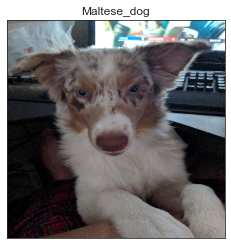

In [96]:
# importing images to test

img_path = ("Data/IMG_20180916_133046.jpg")

img = image.load_img(img_path, target_size=(299, 299))

img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

img_preprocessed = preprocess_input(img_batch)

plt.imshow(img)
plt.title(dog_names2[np.argmax(model.predict(img_preprocessed))])
plt.xticks([])
plt.yticks([])
plt.savefig('Images/TestPrediction1.png', bbox_inches = "tight")

In [91]:
dog_names2[np.argmax(model.predict(img_preprocessed))]

'papillon'

In [75]:
np.argmax(model.predict(img_preprocessed))

72

In [76]:
model.predict(img_preprocessed)


array([[0.02075512, 0.00383194, 0.00426957, 0.00361787, 0.00290307,
        0.00381264, 0.01610515, 0.00864611, 0.00207765, 0.00884857,
        0.00242952, 0.00377775, 0.00208284, 0.00981396, 0.00541503,
        0.00709826, 0.00109796, 0.0008497 , 0.0030719 , 0.0014894 ,
        0.00853962, 0.00528771, 0.00223294, 0.00449774, 0.00080836,
        0.0110253 , 0.00321326, 0.00517409, 0.01623192, 0.00572598,
        0.00176482, 0.00035209, 0.00580755, 0.00044318, 0.00040905,
        0.00037364, 0.00076797, 0.00083276, 0.00304544, 0.00117685,
        0.00095821, 0.00250197, 0.00164946, 0.00046356, 0.02005878,
        0.00835269, 0.02902197, 0.0048097 , 0.02423543, 0.00384365,
        0.0007806 , 0.00181698, 0.00136159, 0.00069265, 0.03994475,
        0.0243363 , 0.00162555, 0.02711161, 0.00256125, 0.00567854,
        0.00118112, 0.00637517, 0.0010972 , 0.01047074, 0.00224717,
        0.00089068, 0.02033799, 0.0012777 , 0.01341057, 0.00252126,
        0.00806051, 0.0028726 , 0.09829059, 0.03